## Import Libraries

In [76]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()     #Use seaborn style on matplotlib plots
import scipy as sp     #Useful for different stats functions
import statsmodels.api as sm     #Useful stats functions
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## Import Dataset

In [77]:
df_train = pd.read_csv(r'C:\Users\sriha\OneDrive\Desktop\DS\My work\Titanic\train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
#import os
#cwd = os.getcwd()
#print(cwd)

## Exploratory Data Analysis

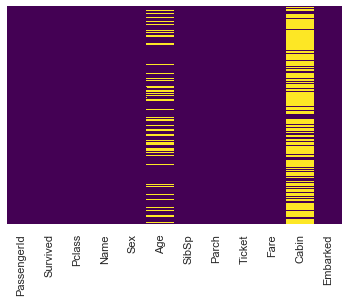

In [79]:
# Check for null values

sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

The age column has several missing values, but this can be filled in based on the other entries. The cabin column however, is mostly empty. This column may need to be dropped.

In [80]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

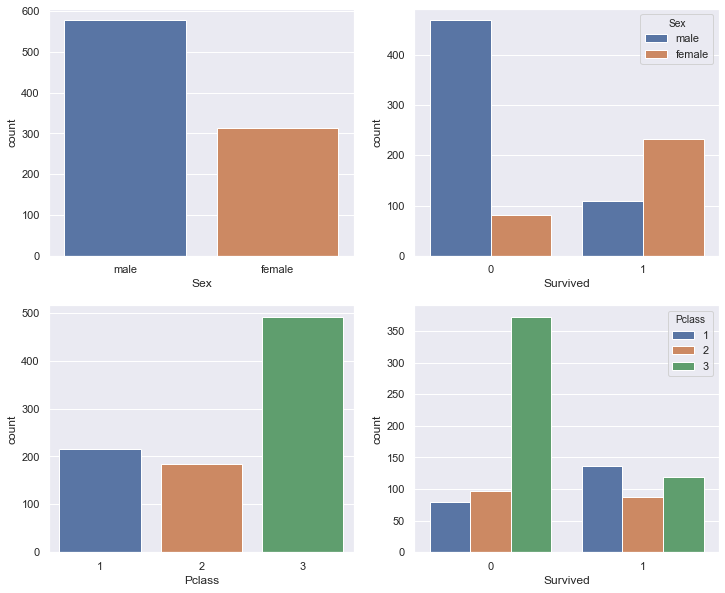

In [81]:
# Explore the different columns

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(x='Sex', data=df_train)
plt.subplot(2,2,2)
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.subplot(2,2,3)
sns.countplot(x='Pclass', data=df_train)
plt.subplot(2,2,4)
sns.countplot(x='Survived', hue='Pclass', data=df_train)

- There were more men present on the ship, but proportionally, more women survived.
- Most of the passengers purchased 3rd class tickets, and the majority of patients who did *not* survive had 3rd class tickets.
    - Majority of passengers with 1st class tickets survived.
    - About the same number of passengers with 2nd class tickets survived as those who did not.
    - Most passengers with 3rd class tickets did not survive.

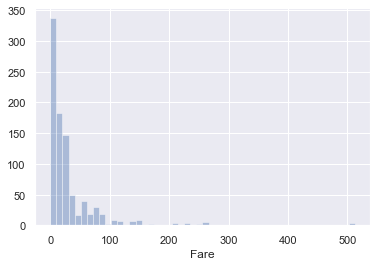

In [82]:
# More data exploration. Look at ticket price distribution
sns.distplot(df_train['Fare'], kde=False)

As noted above, the majority of passengers bought 3rd class tickets, which is confirmed here by the majority of passengers having paid lower fares. 

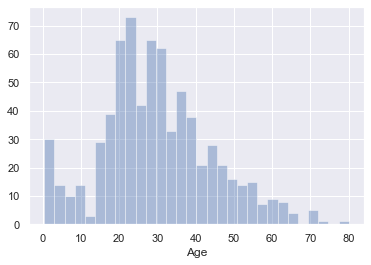

In [83]:
# Look at age distribution
sns.distplot(df_train['Age'].dropna(), bins=30, kde=False)

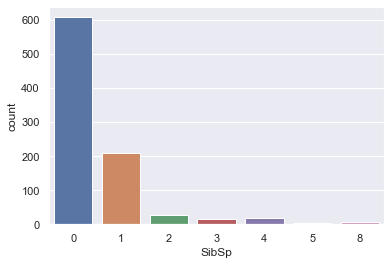

In [84]:
sns.countplot(x='SibSp', data=df_train)

This column shows how many passengers travelled with a sibling or spouse. Looks like the majority of passengers were on the titanic by themselves. About a third as many passengers travelled with one other, possibly a spouse. Only a small minority travelled with more than one person (i.e. spouse and 1+ children).

## Data Cleaning

It makes sense to fill the missing values in the Age column. We could fill these columnsbased on the average age of another category, such as Pclass or Sex. Using PClass here, since it seems to have a stronger impact on whether on not a passenger survived. 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

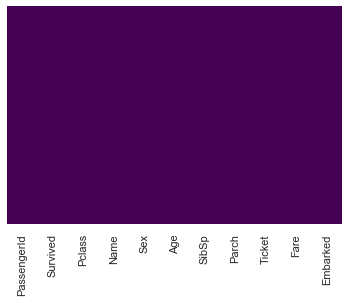

In [85]:
# Fill null values based on Pclass. This can easily be changed to use 'Sex' or another column
df_train['Age'] = df_train.groupby('Pclass')['Age'].apply(lambda x: x.fillna(round(x.mean())))


# Drop the Cabin column, since there are far too many nullvalues to salvage it
df_train.drop('Cabin', axis=1, inplace=True)


# Check the heatmap again to see if it worked
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

df_train.isnull().sum()

'Embarked' has 2 rows with null values, so let's just drop those two rows. 

In [86]:
df_train.dropna(inplace=True)

In [87]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Now, get rid of categorical variables and replace them with dummy variables. 

In [88]:
is_male = pd.get_dummies(df_train['Sex'], drop_first=True)    #Drop the first column to avoid multicollinearity
embarked = pd.get_dummies(df_train['Embarked'], drop_first=True)
pclass = pd.get_dummies(df_train['Pclass'], drop_first=True)     #Note that Pclass is also a categorical variable


# Drop other categorical variables
df_train.drop(['Name','Ticket','Sex','Embarked','Pclass','PassengerId'], axis=1, inplace=True)
#PassengerId isn't giving any useful information, it's just an index

# Add in new columns
df_train = pd.concat([df_train, is_male, embarked, pclass], axis=1)
df_train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Train Logistic Regression Model
Note that we already have two separate datasets for train and test already. But I am running the test train split anyway (simplpy for the purposes of learning the process). This may also be done for the purpose of creating a validation set, which I will do later when I use a Random Forest model. 

In [89]:
# Define X and y
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
lr = LogisticRegression()

# Fit model
lr.fit(X_train, y_train)

# Make Predictions
pred_lr = lr.predict(X_test)

C:\Users\sriha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [90]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       109
           1       0.78      0.75      0.76        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



In [91]:
print(confusion_matrix(y_test, pred_lr))

[[94 15]
 [17 52]]


## Train Random Forest model

In [92]:
# Train random forest model
rc = RandomForestClassifier()
rc.fit(X_train, y_train)
pred_rf = rc.predict(X_test)

print(classification_report(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       109
           1       0.68      0.78      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178

[[83 26]
 [15 54]]


C:\Users\sriha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Tune Hyperparameters

#### Max Depth

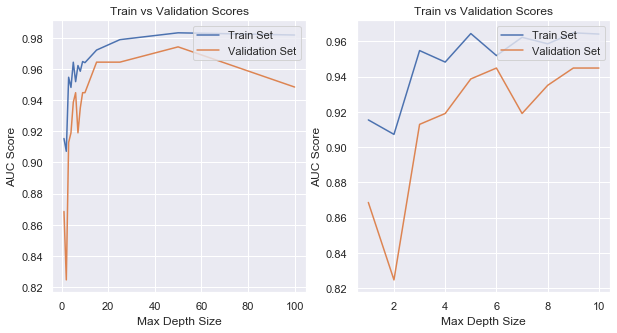

In [93]:
results_train = []
results_val = []
max_depth_size = [1,2,3,4,5,6,7,8,9,10,15,25,50,100]

for depth in max_depth_size:
    model = RandomForestClassifier(depth, n_jobs=-1, random_state=42)
    model.fit(X_train,y_train)
    pred1 = model.predict(X_train)
    pred_val = model.predict(X_val)
    roc1 = roc_auc_score(y_train, pred1)
    roc2 = roc_auc_score(y_val, pred_val)
    results_train.append(roc1)
    results_val.append(roc2)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(max_depth_size, results_train, label='Train Set')
plt.plot(max_depth_size, results_val, label='Validation Set')
plt.xlabel('Max Depth Size')
plt.ylabel('AUC Score')
plt.title('Train vs Validation Scores')
plt.legend(loc="upper right")

plt.subplot(1,2,2)
plt.plot(max_depth_size[0:10], results_train[0:10], label='Train Set')
plt.plot(max_depth_size[0:10], results_val[0:10], label='Validation Set')
plt.xlabel('Max Depth Size')
plt.ylabel('AUC Score')
plt.title('Train vs Validation Scores')
plt.legend(loc="upper right")

#### Max Features

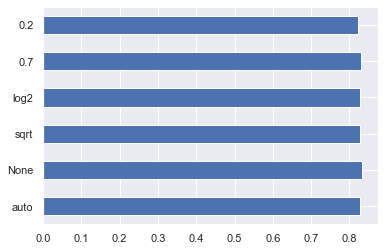

In [94]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.7, 0.2]

for option in max_features_options:
    model = RandomForestClassifier(n_estimators = 300, oob_score=True, n_jobs=-1, random_state=42, max_features=option)
    model.fit(X_train, y_train)
    auc = model.oob_score_
    results.append(auc)
    
pd.Series(results, max_features_options).plot(kind='barh')

#### Minimum samples in Leaves

C:\Users\sriha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sriha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\sriha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\sriha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sriha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not h

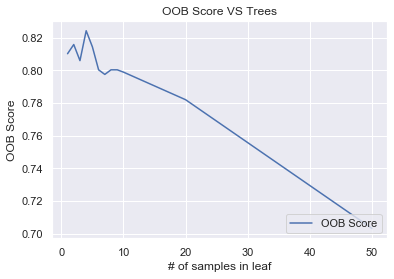

In [95]:
results = []
min_samples_leaf_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50]

for min_samples in min_samples_leaf_values:
    model = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42, min_samples_leaf=min_samples)
    model.fit(X_train, y_train)
    auc = model.oob_score_
    results.append(auc)
    
plt.plot(min_samples_leaf_values, results, label='OOB Score')
plt.xlabel('# of samples in leaf')
plt.ylabel('OOB Score')
plt.title('OOB Score VS Trees')
plt.legend(loc="lower right")

## Retrain model with new hyperparameters; make predictions on test set

In [96]:
# Train random forest model
rc = RandomForestClassifier()
rc.fit(X_train, y_train)
pred_rf = rc.predict(X_test)

print(classification_report(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       109
           1       0.71      0.75      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178

[[88 21]
 [17 52]]


C:\Users\sriha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Compare results with Logistic Regression model

In [102]:
print("Logistic Regression:\n")
print(classification_report(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))
print("\n")

print("Random Forest:\n")
print(classification_report(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))

Logistic Regression:

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       109
           1       0.78      0.75      0.76        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178

[[94 15]
 [17 52]]


Random Forest:

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       109
           1       0.71      0.75      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178

[[88 21]
 [17 52]]


Here, random forest performed worse than logistic regression. Does this mean logistic regression is better? 
Not necessarily. A lot of works hould be put into data preparation. I made a few key decisions for data cleaning and preparation here, which need to be revisited. 

I will revisit this project in the future with the following ideas in mind:
- Can I pull information from the 'Cabin' column without dropping it?
- What kind of information can I pull from the 'Name' column? The names all have titles. Maybe people with higher titles (example, Dr.) had a better chance of surviving.
- What about family size? Did single travellers fare better than people with children/spouses/parents? Vice versa?
- Find out more about hyperparameter tuning and optimize the random forest model. 